In [1]:
import torch
#################################### For Image ################################>
from PIL import Image
from sam3.model_builder import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
import os
import matplotlib.pyplot as plt
import numpy as np
import sam3
from PIL import Image
from sam3 import build_sam3_image_model
from sam3.model.box_ops import box_xywh_to_cxcywh
from sam3.model.sam3_image_processor import Sam3Processor
from sam3.visualization_utils import draw_box_on_image, normalize_bbox, plot_results
# Load the model
model = build_sam3_image_model()
processor = Sam3Processor(model)

/home/pierre/Documents/Projects/PST4/AI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pierre/Documents/Projects/PST4/AI/.venv/lib/python3.13/site-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


In [2]:
device="cuda"

In [3]:
image_path = f"/home/pierre/Downloads/proxy-image.jpg"
# image_path = f"/home/pierre/Pictures/drone1.jpg"
image = Image.open(image_path)
print(image)
width, height = image.size
processor = Sam3Processor(model, confidence_threshold=0.5)
inference_state = processor.set_image(image)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7FF680150C20>


found 1 object(s)


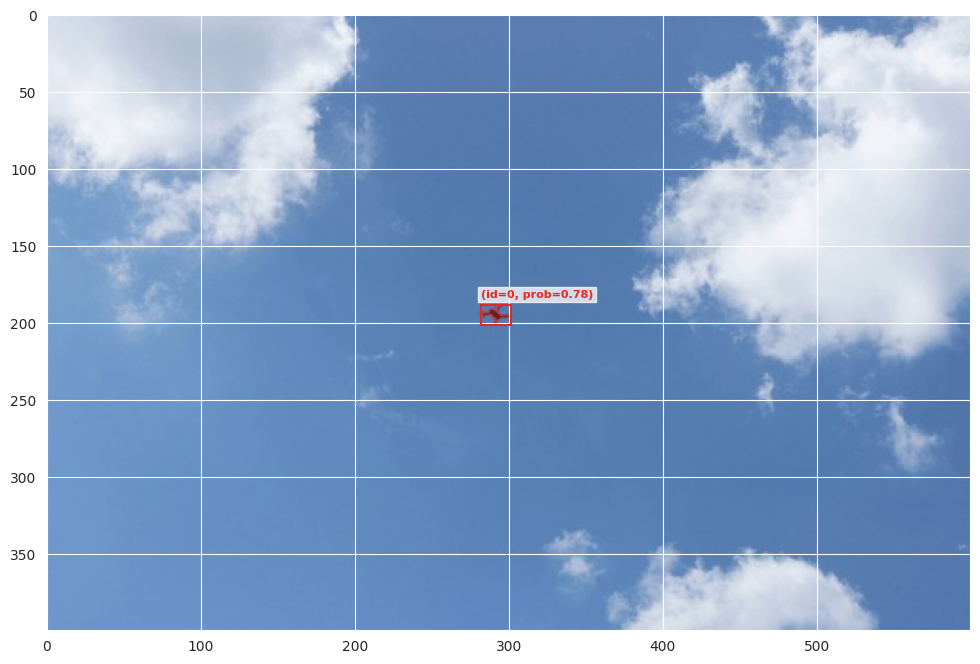

In [4]:
processor.reset_all_prompts(inference_state)
inference_state = processor.set_text_prompt(state=inference_state, prompt="drone")
img0 = Image.open(image_path)
plot_results(img0, inference_state)


In [20]:
streaming_inference_session = processor.init_video_session(
    inference_device=device,
    processing_device="cpu",
    video_storage_device="cpu",
    dtype=torch.bfloat16
)

AttributeError: 'Sam3Processor' object has no attribute 'init_video_session'